In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(f"train: {train.shape} and test is: {test.shape}")

train: (1460, 81) and test is: (1459, 80)


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


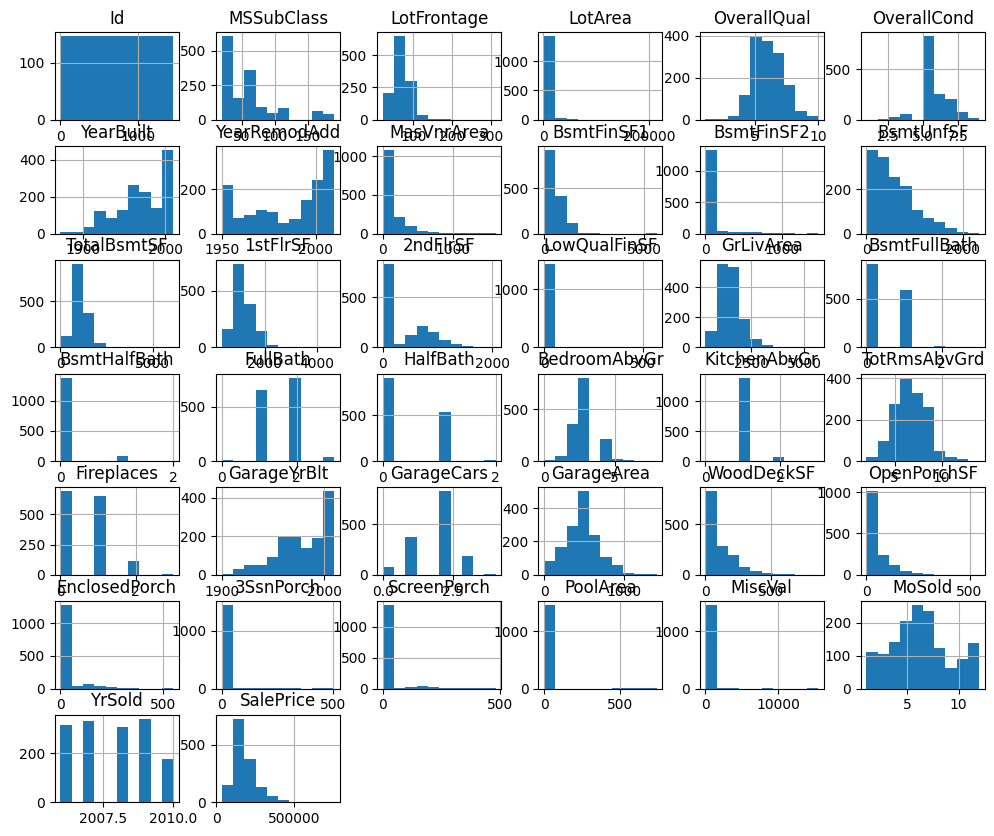

In [7]:
train.hist(figsize=(12,10))
plt.show()

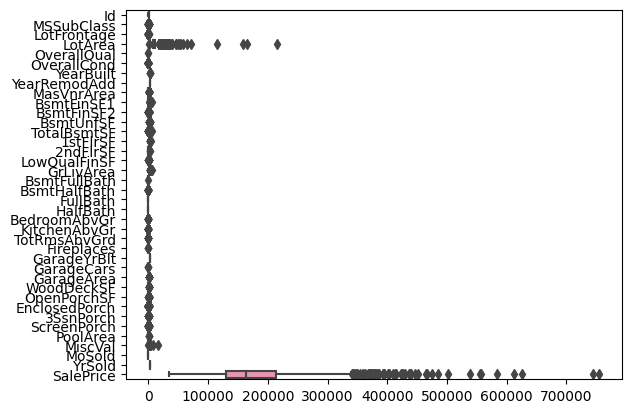

In [8]:
sns.boxplot(data=train, orient='h')
plt.show()

In [9]:
missing_data = train.isnull().sum().sort_values(ascending=False)

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

missing_columns = missing_data[missing_data > 0]

md = pd.concat([missing_data, percent], axis=1, keys=['Total','Percent'])

md.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [10]:
train.loc[:, missing_columns.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
MasVnrType       object
FireplaceQu      object
LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
Electrical       object
dtype: object

In [11]:
train.drop(columns="Id").select_dtypes(include=['number']).columns.shape[0]

37

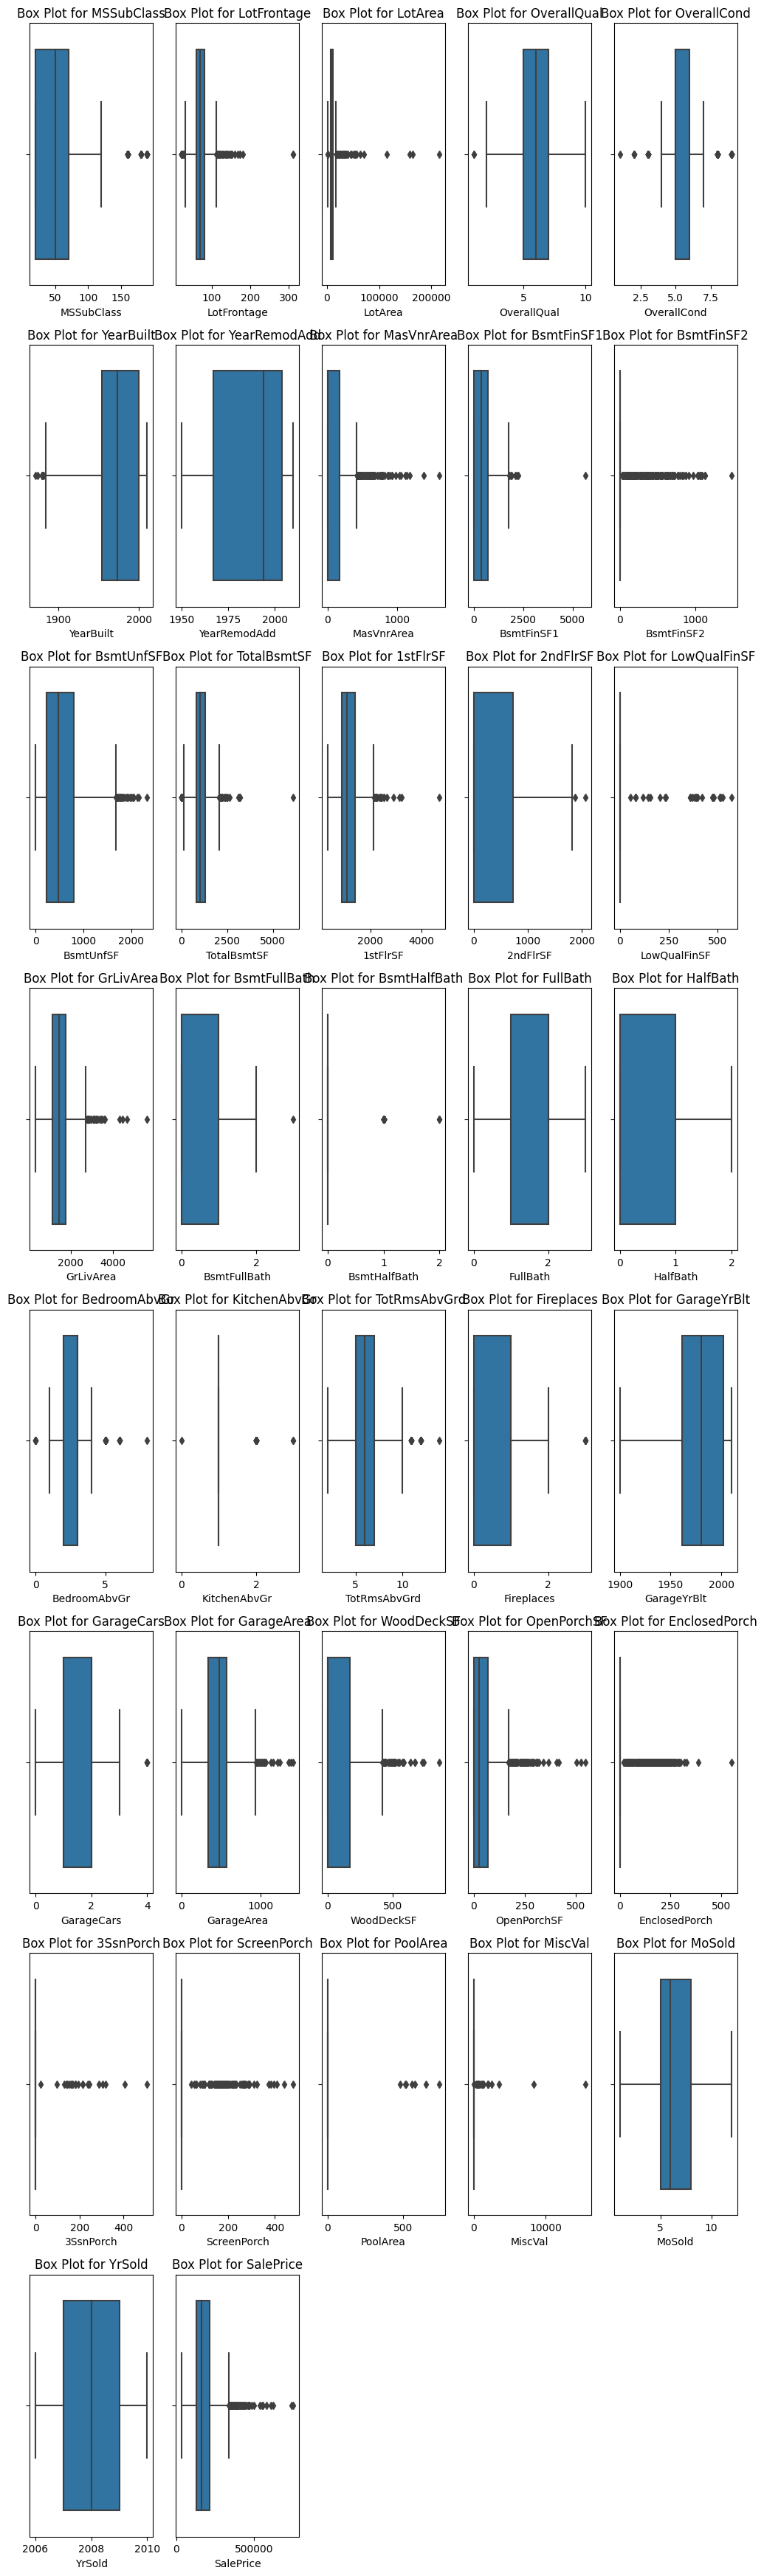

In [12]:
numerical_features = train.drop(columns='Id').select_dtypes(include=['number'])

num_features = len(numerical_features.columns)
num_rows = 8
num_cols = 5

fig,axes = plt.subplots(nrows=num_rows,ncols=num_cols, figsize=(10,35))

axes=axes.flatten()

for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=train[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')

for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()


In [13]:
train.drop(columns="Id").select_dtypes(include=['number']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

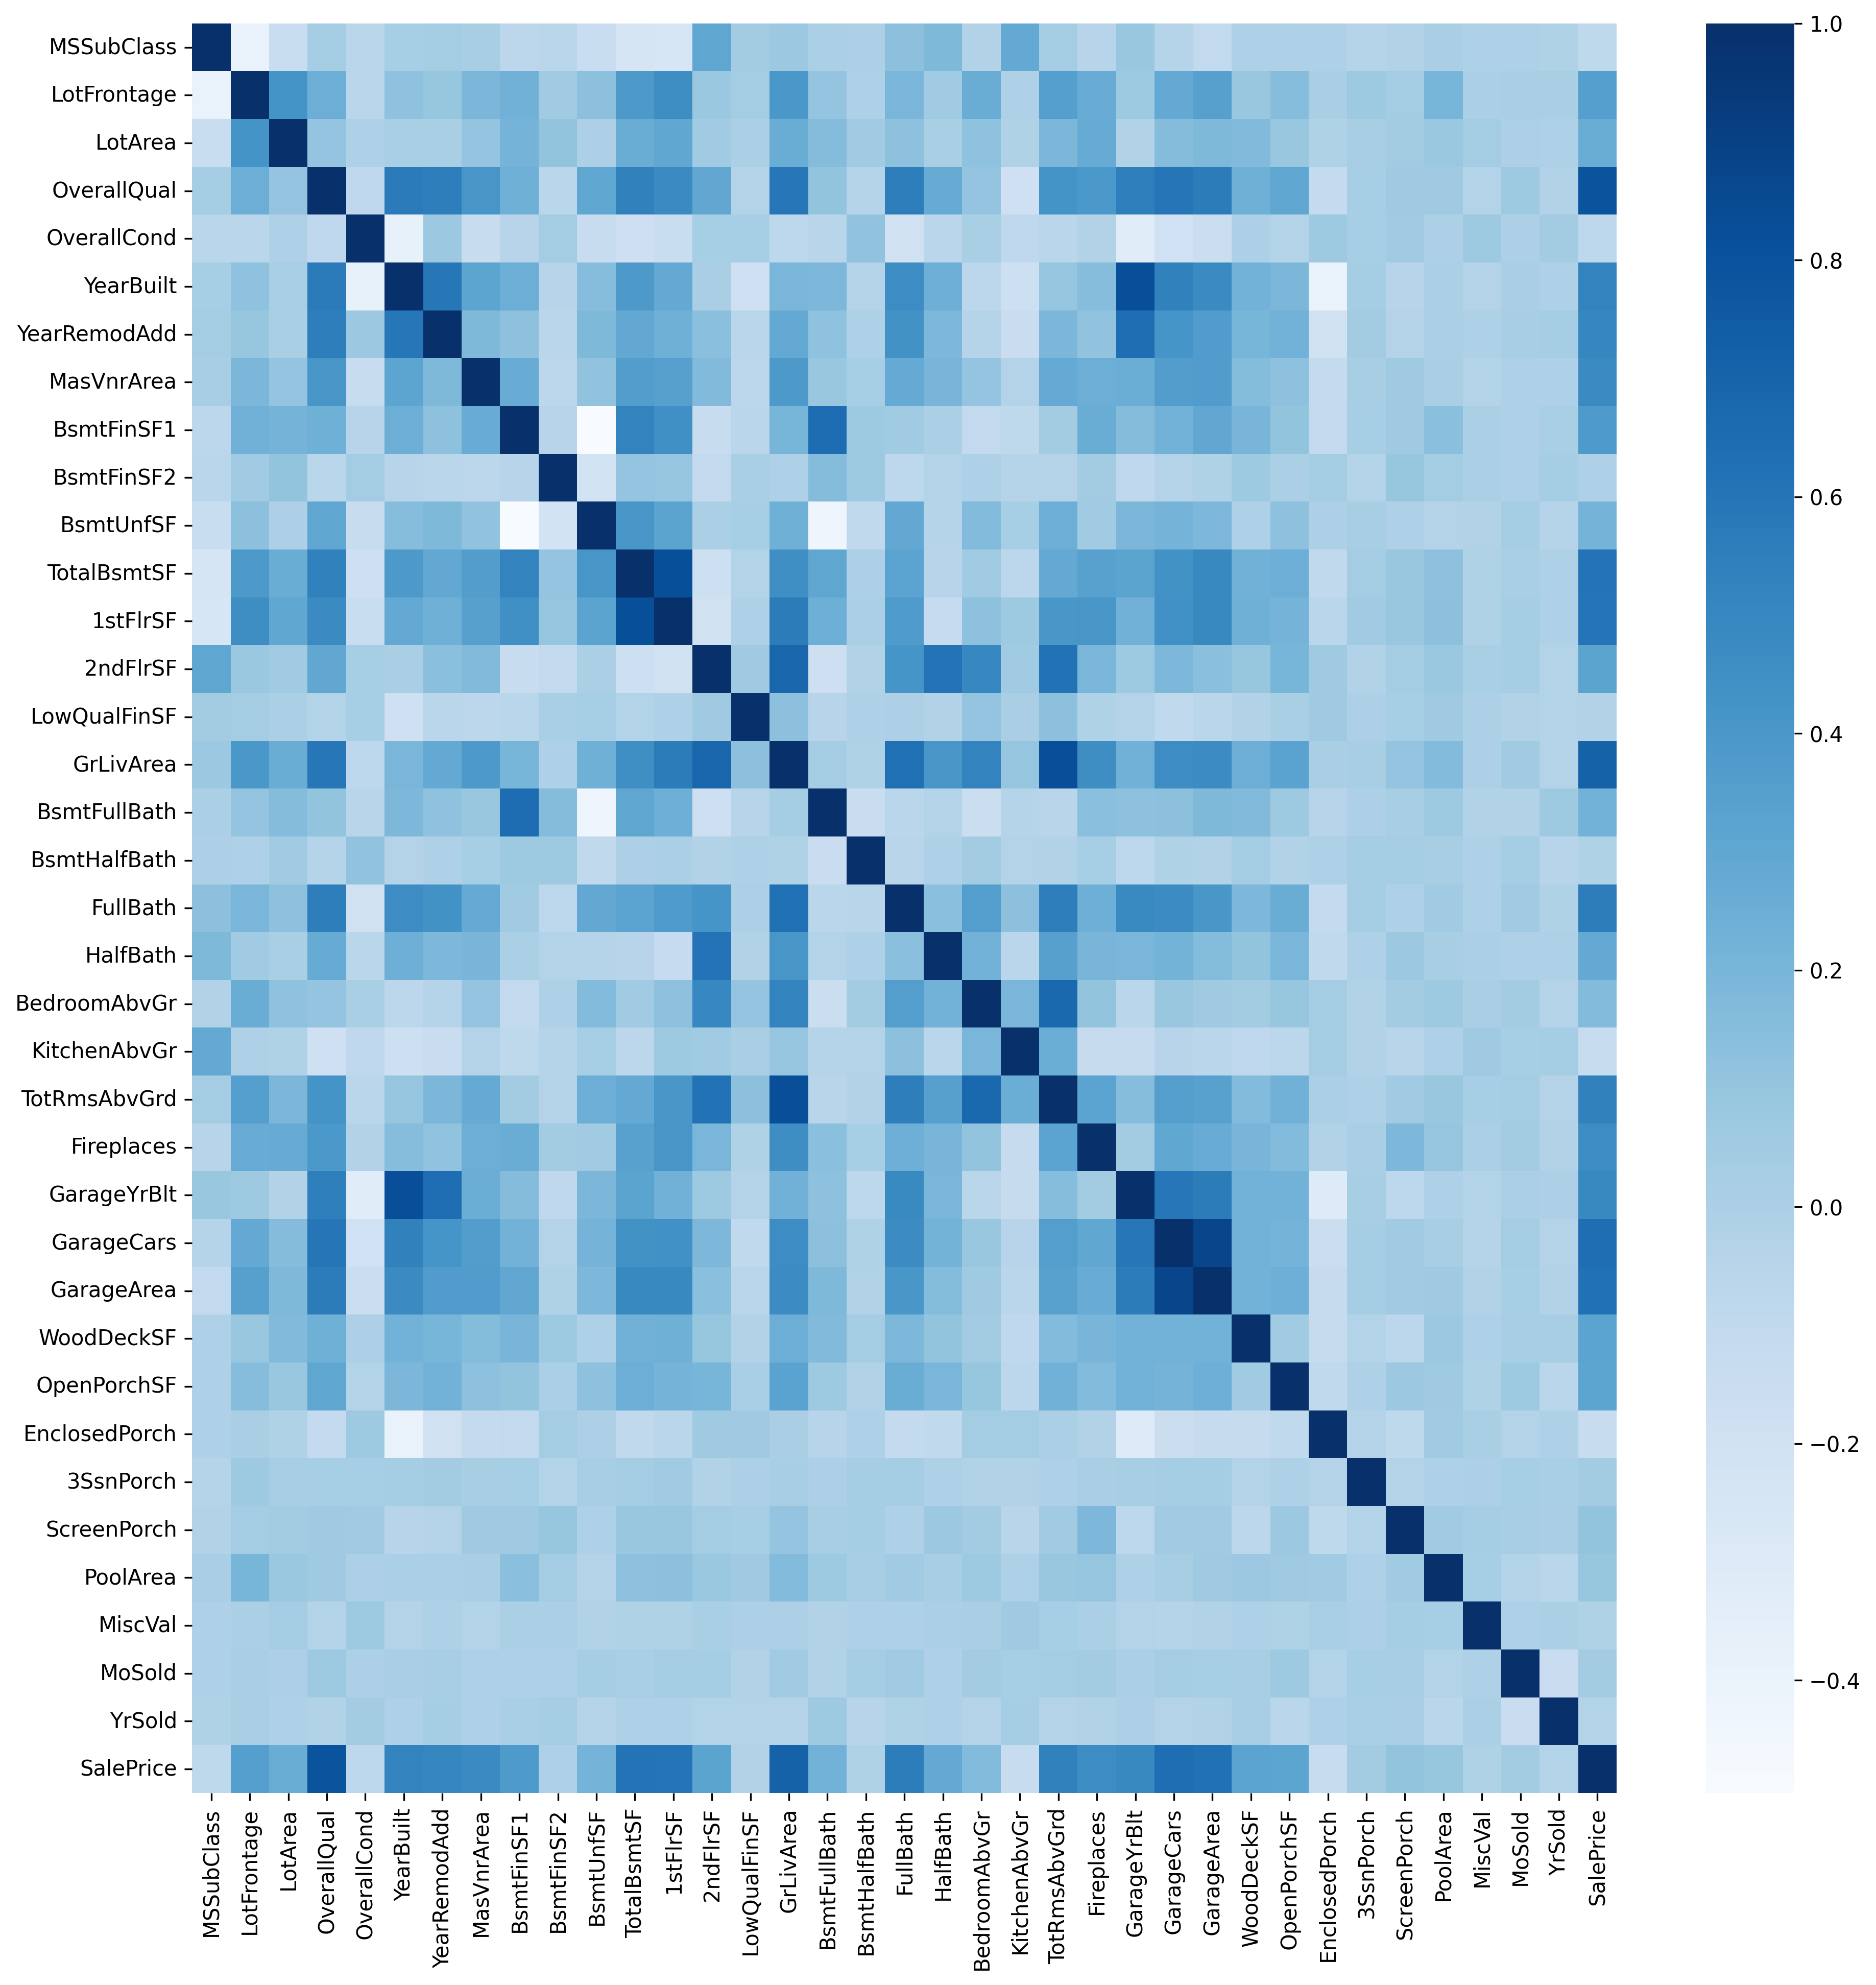

In [14]:
corr = train.drop(columns='Id').corr(numeric_only=True)

plt.figure(figsize=(15,15), dpi=300)

sns.heatmap(corr, cmap="Blues")

In [15]:
cor = corr["SalePrice"].apply(abs).sort_values(ascending=False).reset_index()
print(cor.shape)
cor

(37, 2)


,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


# Feature engineering

In [25]:
print(f"before delete weak correlation => {train.shape}")
train = train.drop(cor.iloc[21: , 0].values,axis=1)
print(f"after delete weak correlation => {train.shape}")

before delete weak correlation => (1460, 81)
after delete weak correlation => (1460, 65)


In [26]:
name_of_col = train.drop(columns='Id').select_dtypes(include=['number']).columns

In [28]:
for col in name_of_col:
    nan_indices = train[col].isnull()
    rand_sample = train[col].dropna().sample(n=nan_indices.sum(), replace=True)
    train.loc[nan_indices, col] = rand_sample.values

In [29]:
col_has_numbers = train.drop(columns="Id").select_dtypes(include=['number'])
col_has_numbers.isnull().sum().sort_values(ascending=True)

LotFrontage     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
OpenPorchSF     0
GrLivArea       0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
LotArea         0
2ndFlrSF        0
SalePrice       0
dtype: int64

In [38]:
name_of_col = train.drop(columns="Id").select_dtypes(include=['object']).columns

for col in name_of_col:
    mode_for_col = train[col].mode()[0]
    train[col].fillna(mode_for_col, inplace=True)

col_has_numbers = train.drop(columns="Id").select_dtypes(include=['object'])
col_has_numbers.isnull().sum().sort_values(ascending=True).astype("float")

MSZoning         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
BsmtCond         0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
FireplaceQu      0.0
SaleType         0.0
BsmtQual         0.0
ExterCond        0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Foundation       0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
Condition2       0.0
SaleCondition    0.0
dtype: float64

## Handling outliers

In [39]:
def outliers(dataframe, column):
    q1= dataframe[column].quantile(0.25)
    q3= dataframe[column].quantile(0.75)

    iqr = q3-q1
    low=q1 * 1.5 - iqr
    high=q3 * 1.5 +iqr
    outliers = dataframe[(dataframe[column] < low)|(dataframe[column] > high)]
    dataframe.loc[(dataframe[col]>high, col)]=high
    dataframe.loc[(dataframe[col]<low, col)]=low

    return dataframe

for col in train.drop(columns='Id').select_dtypes(include=['number']).columns:
    train = outliers(train, col)

/var/folders/l7/30f8bdk96jzfpybnn_f0_qn00000gn/T/ipykernel_47988/727686879.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4327.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col]>high, col)]=high


this plot show the outoutliers in each column After delete them


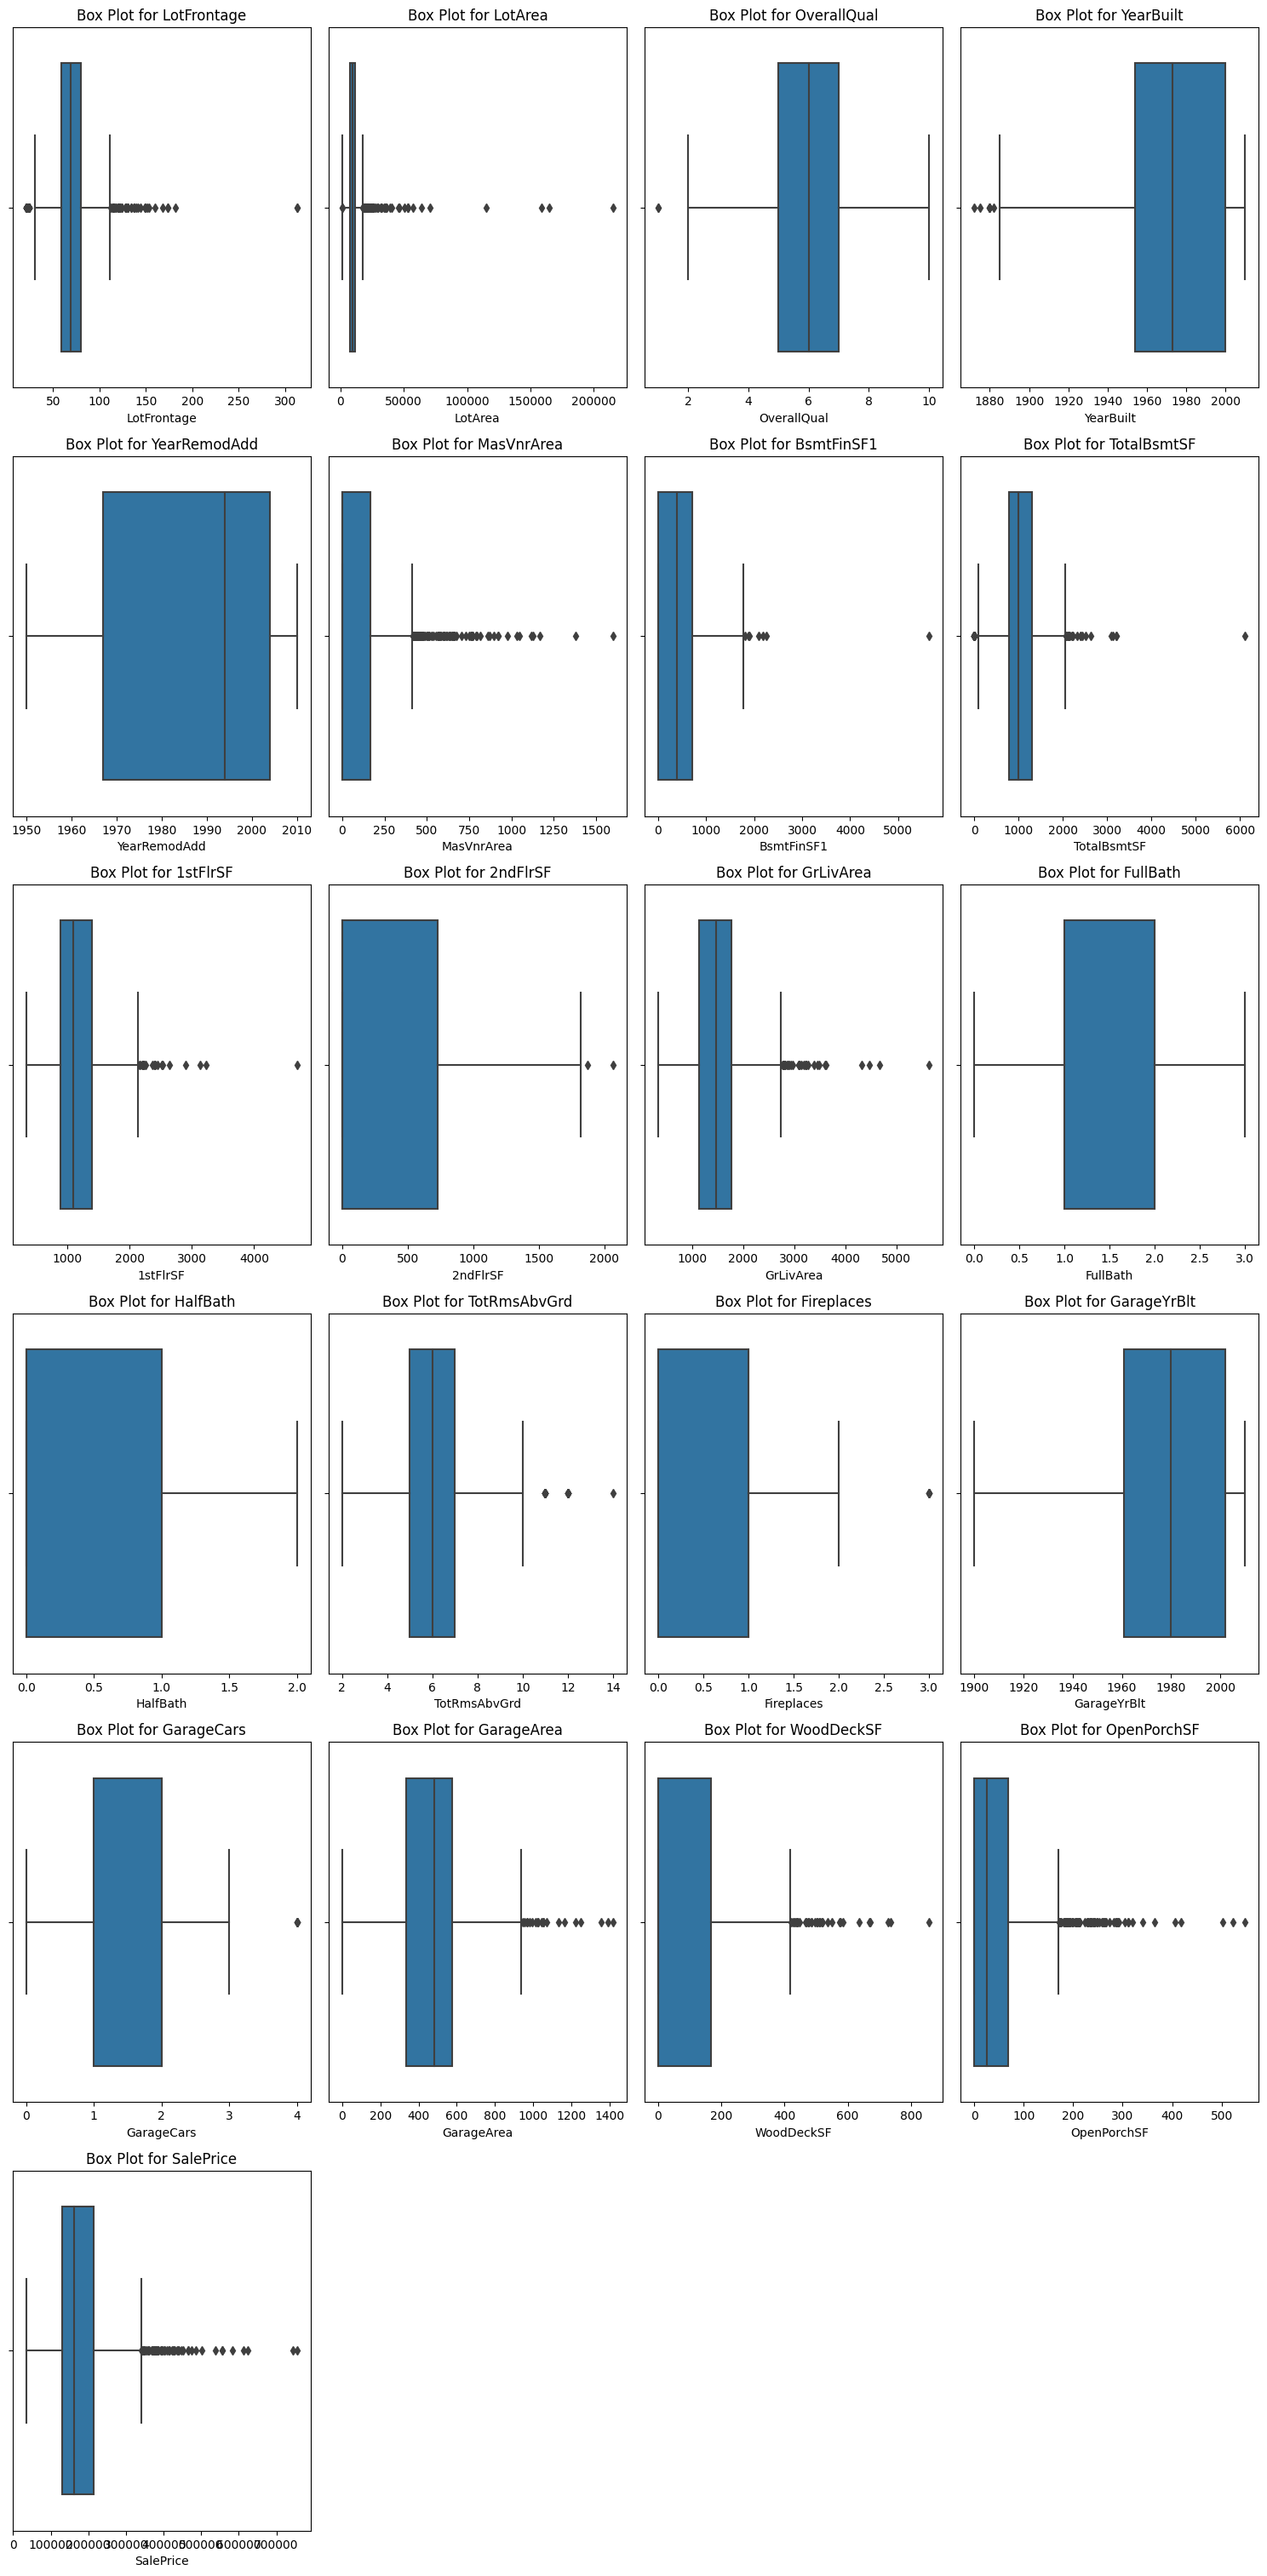

In [40]:
print("this plot show the outoutliers in each column After delete them")

# Select only numerical features
numerical_features = train.drop(columns="Id").select_dtypes(include=['number'])
# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 4  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=houses[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [41]:
# object (text) columns
obj_col = train.drop(columns="Id").select_dtypes(include=['object']).columns
obj_col = pd.DataFrame(obj_col, columns=["text col"])
print(obj_col)

         text col
0        MSZoning
1          Street
2           Alley
3        LotShape
4     LandContour
5       Utilities
6       LotConfig
7       LandSlope
8    Neighborhood
9      Condition1
10     Condition2
11       BldgType
12     HouseStyle
13      RoofStyle
14       RoofMatl
15    Exterior1st
16    Exterior2nd
17     MasVnrType
18      ExterQual
19      ExterCond
20     Foundation
21       BsmtQual
22       BsmtCond
23   BsmtExposure
24   BsmtFinType1
25   BsmtFinType2
26        Heating
27      HeatingQC
28     CentralAir
29     Electrical
30    KitchenQual
31     Functional
32    FireplaceQu
33     GarageType
34   GarageFinish
35     GarageQual
36     GarageCond
37     PavedDrive
38         PoolQC
39          Fence
40    MiscFeature
41       SaleType
42  SaleCondition


In [42]:
# label encoder to convert objects to appropriate numerical values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in obj_col.values.flatten():
    train[col]=encoder.fit_transform(train[col])

# Model building

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [44]:
# split data to features and target
X = train.iloc[:, :-1].values
y = train.iloc[:, -1:].values

# split data to train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [48]:
print(f"train score: {model.score(X_train, y_train)}")

print(f"test score: {model.score(X_test, y_test)}")

train score: 0.8431232356448957
test score: 0.8482436467177894


In [49]:
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 13455.91097746046
